In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import os
import trueq as tq

In [3]:
circuits = tq.make_srb(1, [4, 32, 64])
tq.Simulator().add_overrotation(0.05).run(circuits, n_shots=1024)

In [4]:
# use a temporary folder so that this example doesn't make a mess
with tq.utils.temp_folder():
    # the extension ".tq" is arbitrary but encouraged
    circuits.save("my_circuits.tq")
    file_size = os.path.getsize("my_circuits.tq")
    print(f"Saved file is {file_size} bytes.")

    # load the circuits back to disk
    loaded_circuits = tq.load("my_circuits.tq")

Saved file is 11408 bytes.


In [5]:
print(loaded_circuits is not circuits and loaded_circuits == circuits)
print(loaded_circuits[0] is not circuits[0] and loaded_circuits[0] == circuits[0])

True
True


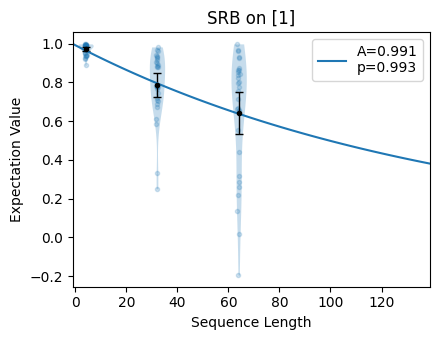

In [6]:
loaded_circuits.plot.raw()

This file is 6.56x smaller.


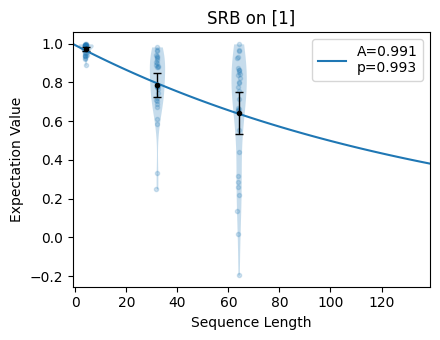

In [7]:
with tq.utils.temp_folder():
    # the extension ".tq" is arbitrary but encouraged
    circuits.save("my_circuits2.tq", include_cycles=False)

    size_ratio = file_size / os.path.getsize("my_circuits2.tq")
    print(f"This file is {size_ratio:.2f}x smaller.")

    # load the circuits back to disk
    loaded_circuits2 = tq.load("my_circuits2.tq")

loaded_circuits2.plot.raw()

This file is 14.50x smaller.


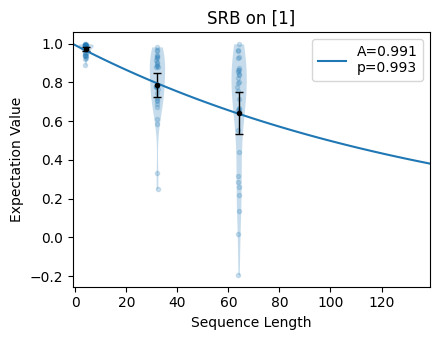

In [8]:
with tq.utils.temp_folder():
    tq.utils.save(circuits.fit(), "my_fit.fit")

    size_ratio = file_size / os.path.getsize("my_fit.fit")
    print(f"This file is {size_ratio:.2f}x smaller.")

    loaded_fit = tq.load("my_fit.fit")

loaded_fit
loaded_fit.plot.raw()